# Imports

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time
import glob
import os
import sys
import cv2
import math


from myAgent import CarlaAgent
from simSync import SimulatorSynchronous

try:
    sys.path.append(glob.glob('./carla-*%d.%d-%s.egg' % (
        sys.version_info.major,
        sys.version_info.minor,
        'win-amd64' if os.name == 'nt' else 'linux-x86_64'))[0])
except IndexError:
    pass

import carla

## Synchronous with old agent

In [ ]:
myAgent = CarlaAgent()

# myAgent.world = myAgent.client.load_world("Town04")
myAgent.map = myAgent.world.get_map()

In [ ]:
settings = myAgent.world.get_settings()

settings.fixed_delta_seconds = 1/15      # rendering interval
settings.substepping = True              # physics sub-stepping
settings.max_substep_delta_time = 0.01
settings.max_substeps = 10 
settings.synchronous_mode = True         # Enables synchronous mode

myAgent.world.apply_settings(settings)

In [ ]:
for i in range(10000):
    myAgent.world.tick()
    time.sleep(1/15)

## New Synchronous Simulation

In [2]:
simsim = SimulatorSynchronous(fps=15, no_agents=16, port=2000)
simsim.spawn_agents()

Establishing Connection to Server
Probably connected not sure tho
created vehicle.tesla.model3
created sensor.camera.rgb
created vehicle.tesla.model3
created sensor.camera.rgb
created vehicle.tesla.model3
created sensor.camera.rgb
created vehicle.tesla.model3
created sensor.camera.rgb
created vehicle.tesla.model3
created sensor.camera.rgb
created vehicle.tesla.model3
created sensor.camera.rgb
created vehicle.tesla.model3
created sensor.camera.rgb
created vehicle.tesla.model3
created sensor.camera.rgb
created vehicle.tesla.model3
created sensor.camera.rgb
created vehicle.tesla.model3
created sensor.camera.rgb
created vehicle.tesla.model3
created sensor.camera.rgb
created vehicle.tesla.model3
created sensor.camera.rgb
created vehicle.tesla.model3
created sensor.camera.rgb
created vehicle.tesla.model3
created sensor.camera.rgb
created vehicle.tesla.model3
created sensor.camera.rgb
created vehicle.tesla.model3
created sensor.camera.rgb


In [5]:
simsim.world.tick()

simsim.agent[0].update_image()
simsim.agent[1].update_image()
simsim.agent[2].update_image()
simsim.agent[3].update_image()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1670de97648>)

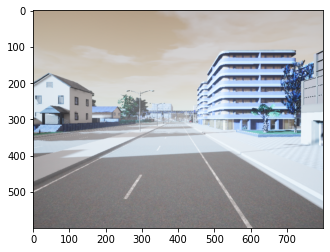

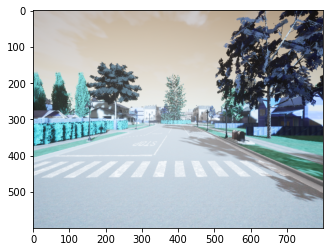

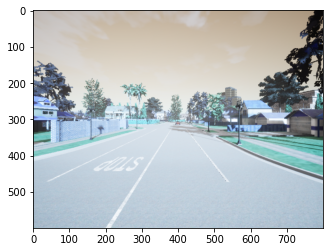

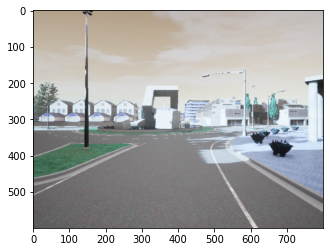

In [6]:
plt.figure(), plt.imshow(simsim.agent[0].image)
plt.figure(), plt.imshow(simsim.agent[1].image)
plt.figure(), plt.imshow(simsim.agent[2].image)
plt.figure(), plt.imshow(simsim.agent[3].image)

In [3]:
simulation_time = 30


t0 = time.time()

simulated_frames = 0

for i in range(simsim.no_agents):
    simsim.agent[i].vehicle.set_autopilot(True)


while (time.time() - t0 < simulation_time):
    simsim.world.tick()
    simulated_frames += 1
    
    for i in range(simsim.no_agents):
        simsim.agent[i].update_image()
        frame_name = "agent " + str(i)
#         cv2.imshow(frame_name, simsim.agent[i].image)
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
    
    
for i in range(simsim.no_agents):
    simsim.agent[i].vehicle.set_autopilot(False)

simsim.world.tick()
# cv2.destroyAllWindows()

print("FPS: " + str(simulated_frames/simulation_time))

FPS: 8.833333333333334


## Terminate

In [4]:
simsim.terminate()
simsim.world.tick()

destroying actors
terminated


13992